In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
trainingSet = pd.read_csv('data/training.csv')  # read the data
testingSet = pd.read_csv('data/testing.csv')  # read the data

In [3]:
# print(trainingSet.head(10))  # displays the first 5 elements in training data
# print(testingSet.head(10))  # displays the first 5 elements in testing data

In [4]:
# training data
X_train = trainingSet.iloc[:, :-1]  # X_train contains the features only without the class
y_train = trainingSet.iloc[:, -1]  # Y_train contains the class only without the features

In [5]:
# testing data
X_test = testingSet.iloc[:, :-1]  # X_test contains the features only without the class
y_test = testingSet.iloc[:, -1]  # Y_test contains the class only without the features

In [6]:
# print(trainingSet.head(5))  # displays the first 5 elements in training data
# print(X_train.head(5))  # displays the features of first 5 elements in training data
# print(y_train.head(5))  # displays the class of first 5 elements in training data

In [7]:
# print(testingSet.head(5))  # displays the first 5 elements in testing data
# print(X_test.head(5))  # displays the features of first 5 elements in testing data
# print(y_test.head(5))  # displays the class of first 5 elements in testing data

In [8]:
# print(len(X_train))
# print(len(X_test))
# print(len(y_train))
# print(len(y_test))

In [9]:
scaler = MinMaxScaler(copy=True, feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# print(type(X_train))
# print(type(X_test))
# print(type(y_train))
# print(type(y_test))

In [11]:
X_Ktrain = []
y_Ktrain = []
k = 4
step = len(X_train)/k
step = np.ceil(step)
step = int(step)
for i in range(0,len(X_train),step):
    X_Ktrain.append(X_train[i:i+step])
    y_Ktrain.append(y_train[i:i+step])
# print(type(X_train))
# print(type(y_train))
# print(type(y_Ktrain[0]))
# print(type(X_Ktrain[0]))

## Cross validation range(1,1000) with step 100

In [12]:
error = []
for i in range(1,1000,100):
    for j in range(1,len(X_Ktrain)):
        err1 = 0
        for m in range(1,len(X_Ktrain)):
            if m == j:
                continue
            rnForest = RandomForestClassifier(n_estimators=i)
            rnForest.fit(X_Ktrain[m], y_Ktrain[m])
            y_true = y_Ktrain[j]
            y_pred = rnForest.predict(X_Ktrain[j])
            err = mean_squared_error(y_true, y_pred)
            err1 = err1 + err
    error.append(err1)
#     print('n_est = ', i, 'err = ', err1)
#     print("######################################\n")
        
# print(error)

Text(0, 0.5, 'Mean_Squared_Error')

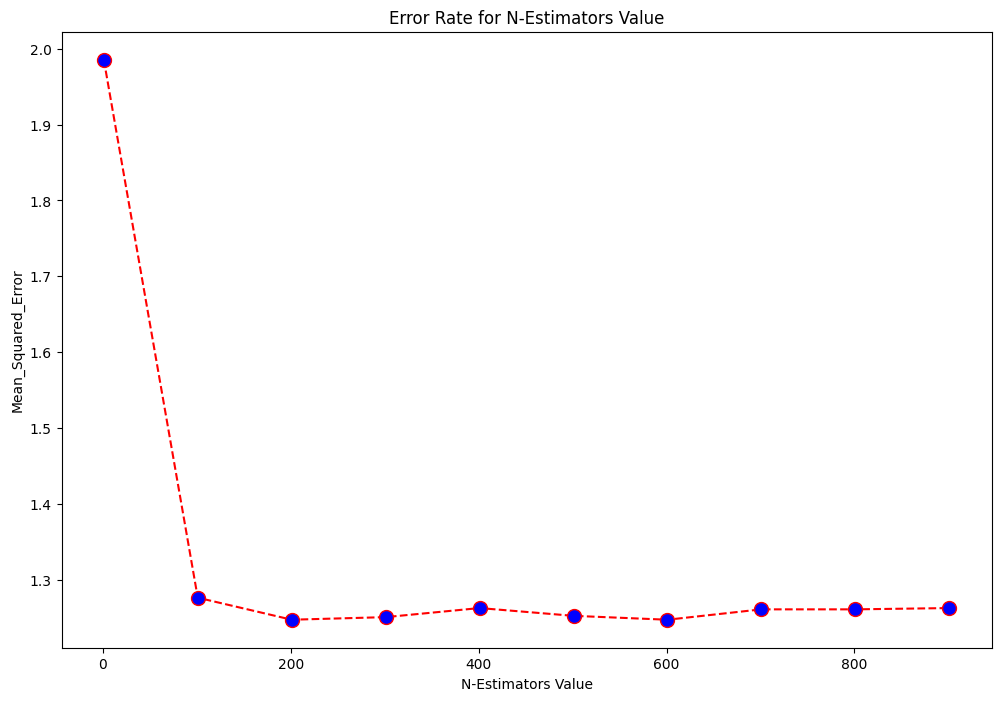

In [26]:
plt.figure(figsize=(12,8))
plt.plot(range(1,1000,100), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate for N-Estimators Value')
plt.xlabel('N-Estimators Value')
plt.ylabel('Mean_Squared_Error')

## Cross validation range(1,300) with step 20

In [16]:
error = []
for i in range(1,300,20):
    for j in range(1,len(X_Ktrain)):
        err1 = 0
        for m in range(1,len(X_Ktrain)):
            if m == j:
                continue
            rnForest = RandomForestClassifier(n_estimators=i)
            rnForest.fit(X_Ktrain[m], y_Ktrain[m])
            y_true = y_Ktrain[j]
            y_pred = rnForest.predict(X_Ktrain[j])
            err = mean_squared_error(y_true, y_pred)
            err1 = err1 + err
    error.append(err1)
    print('n_est = ', i, 'err = ', err1)
    print("######################################\n")
        
print(error)

n_est =  1 err =  1.8880820162323793
######################################

n_est =  21 err =  1.312259718069201
######################################

n_est =  41 err =  1.3242204186245194
######################################

n_est =  61 err =  1.2644169158479284
######################################

n_est =  81 err =  1.2678342588637332
######################################

n_est =  101 err =  1.2422041862451945
######################################

n_est =  121 err =  1.2661255873558308
######################################

n_est =  141 err =  1.2422041862451945
######################################

n_est =  161 err =  1.2866296454506623
######################################

n_est =  181 err =  1.2456215292609996
######################################

n_est =  201 err =  1.2507475437847075
######################################

n_est =  221 err =  1.2473302007689022
######################################

n_est =  241 err =  1.260999572832123
#####################

Text(0, 0.5, 'Mean_Squared_Error')

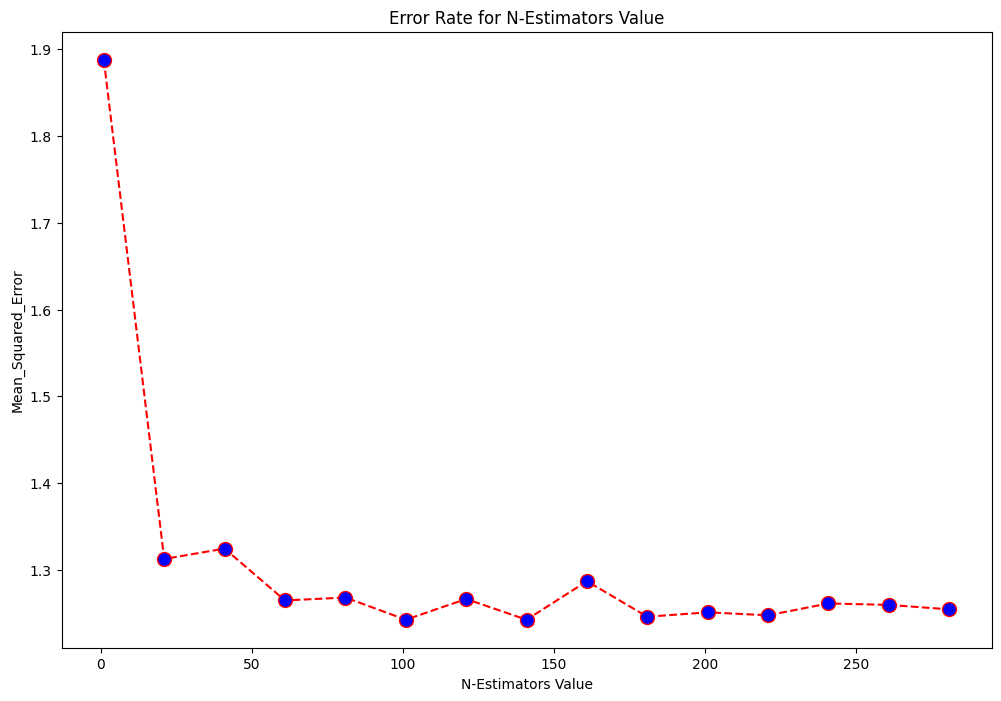

In [17]:
plt.figure(figsize=(12,8))
plt.plot(range(1,300,20), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate for N-Estimators Value')
plt.xlabel('N-Estimators Value')
plt.ylabel('Mean_Squared_Error')

In [18]:
minErr = min(error)
min_index = error.index(minErr)
n_est = 1 + 20*min_index
print(n_est, error[min_index])

101 1.2422041862451945


In [19]:
rnForest = RandomForestClassifier(n_estimators=n_est)
rnForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=101)

In [20]:
y_pred = rnForest.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.86      0.83      0.85      2006
           1       0.84      0.87      0.85      2006

    accuracy                           0.85      4012
   macro avg       0.85      0.85      0.85      4012
weighted avg       0.85      0.85      0.85      4012



In [22]:
print(confusion_matrix(y_test, y_pred))

[[1672  334]
 [ 267 1739]]
